## TSF TASK 2: Unsupervised Learning (K- Means Clustering)

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.



### Importing Libraries

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from sklearn import datasets

In [2]:
# Load the iris dataset
df = pd.read_csv("Iris.csv")
#print 5 rows
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#new iris dataframe by dropping target vector
df_iris=df.copy()
df_iris.drop(['Id','Species'],axis=1,inplace=True)
df_iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# Clustering

### Finding optimum value of K(clusters) using Elbow Method



In [5]:
from sklearn.cluster import KMeans
new_iris=[]
for i in range(1,11):
    irisk_model=KMeans(n_clusters=i)
    irisk_model.fit(df_iris.iloc[:,:-1])
    new_iris.append(irisk_model.inertia_)
    
new_iris

[594.0446666666667,
 133.45714841470533,
 69.50013924466339,
 49.50821558441559,
 40.39566666666667,
 32.920005128205126,
 29.087761554065906,
 25.714439393939397,
 23.663979004329004,
 22.102546828171825]

Text(0.5, 1.0, 'The Elbow Method')

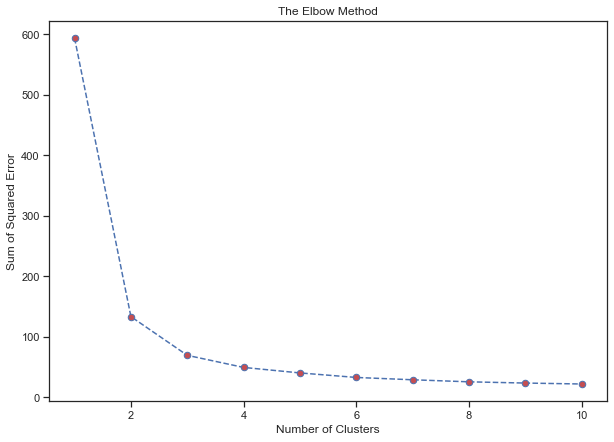

In [6]:
sns.set_style('ticks')
plt.figure(figsize=(10,7))
plt.plot(range(1,11),new_iris,marker='.',markersize=13,markerfacecolor='r',ls='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Error')
plt.title('The Elbow Method')

In [7]:
irisk_model2=KMeans(n_clusters=3,random_state=0)

pred=irisk_model2.fit_predict(df_iris)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [8]:
df_iris['Cluster']=pred
df_iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


# Visualization



## Plotting scatterplots for Original and Clusterized data

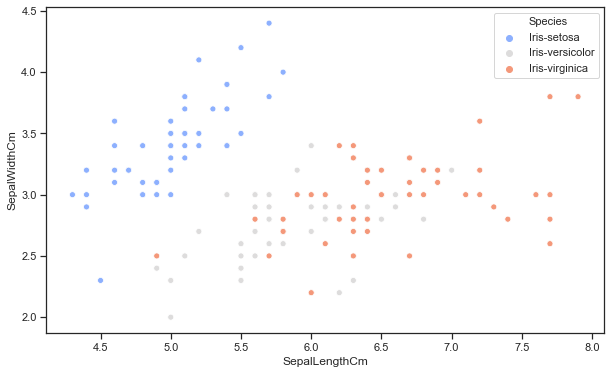

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df,hue='Species',palette='coolwarm')

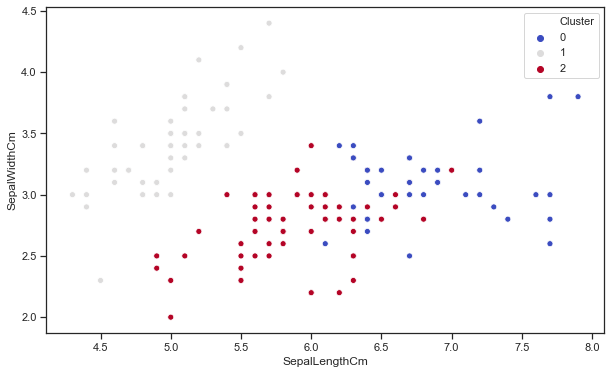

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm',data=df_iris,hue='Cluster',palette='coolwarm')

## Plotting scatterplot for Clusters with their Centroids

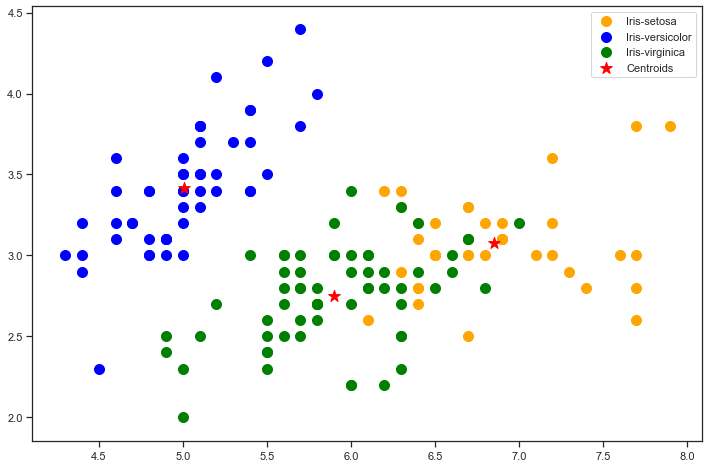

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(df_iris[df_iris['Cluster'] == 0].iloc[:,0], df_iris[df_iris['Cluster'] == 0].iloc[:,1], 
            s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(df_iris[df_iris['Cluster'] == 1].iloc[:,0], df_iris[df_iris['Cluster'] == 1].iloc[:,1], 
            s = 100, c = 'blue', label = 'Iris-versicolor')
plt.scatter(df_iris[df_iris['Cluster'] == 2].iloc[:,0], df_iris[df_iris['Cluster'] == 2].iloc[:,1], 
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(irisk_model2.cluster_centers_[:, 0], irisk_model2.cluster_centers_[:,1],marker='*',
            s = 150, c = 'red', label = 'Centroids')

plt.legend()